In [190]:
# Import Modules
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from pathlib import Path

In [417]:
# Set paths to csv files
call_volume = Path("./data/Call_Volume_20211102.csv")
prices = Path("./data/Stock_Prices_20211102.csv")
put_volume = Path("./data/Put_Volume_20211102.csv")
SPY_prices = Path("./data/SPY_Price_20211102.csv")
short_interest = Path("./data/Short_Interest_20211102.csv")
sub_sectors = Path("./data/Subsectors_20211102.csv")
all_sectors = Path("./data/Sectors_20211102.csv")

#sp500_path = Path("../Resources/sp500.csv")

In [418]:
# Read in csv files
call_volume_df = pd.read_csv(
    call_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

price_df = pd.read_csv(
    prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

put_volume_df = pd.read_csv(
    put_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

SPY_prices_df = pd.read_csv(
    SPY_prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

short_interest_df = pd.read_csv(
    short_interest, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

sub_sectors_df = pd.read_csv(
    sub_sectors
)

all_sectors_df = pd.read_csv(
    all_sectors
)


#call_volume_df
SPY_prices_df

,SPY
date,
2019-11-01,296.1603
2019-11-04,297.3502
2019-11-05,297.0213
2019-11-06,297.0890
2019-11-07,298.1338
...,...
2021-11-03,464.7200
2021-11-04,466.9100
2021-11-05,468.5300


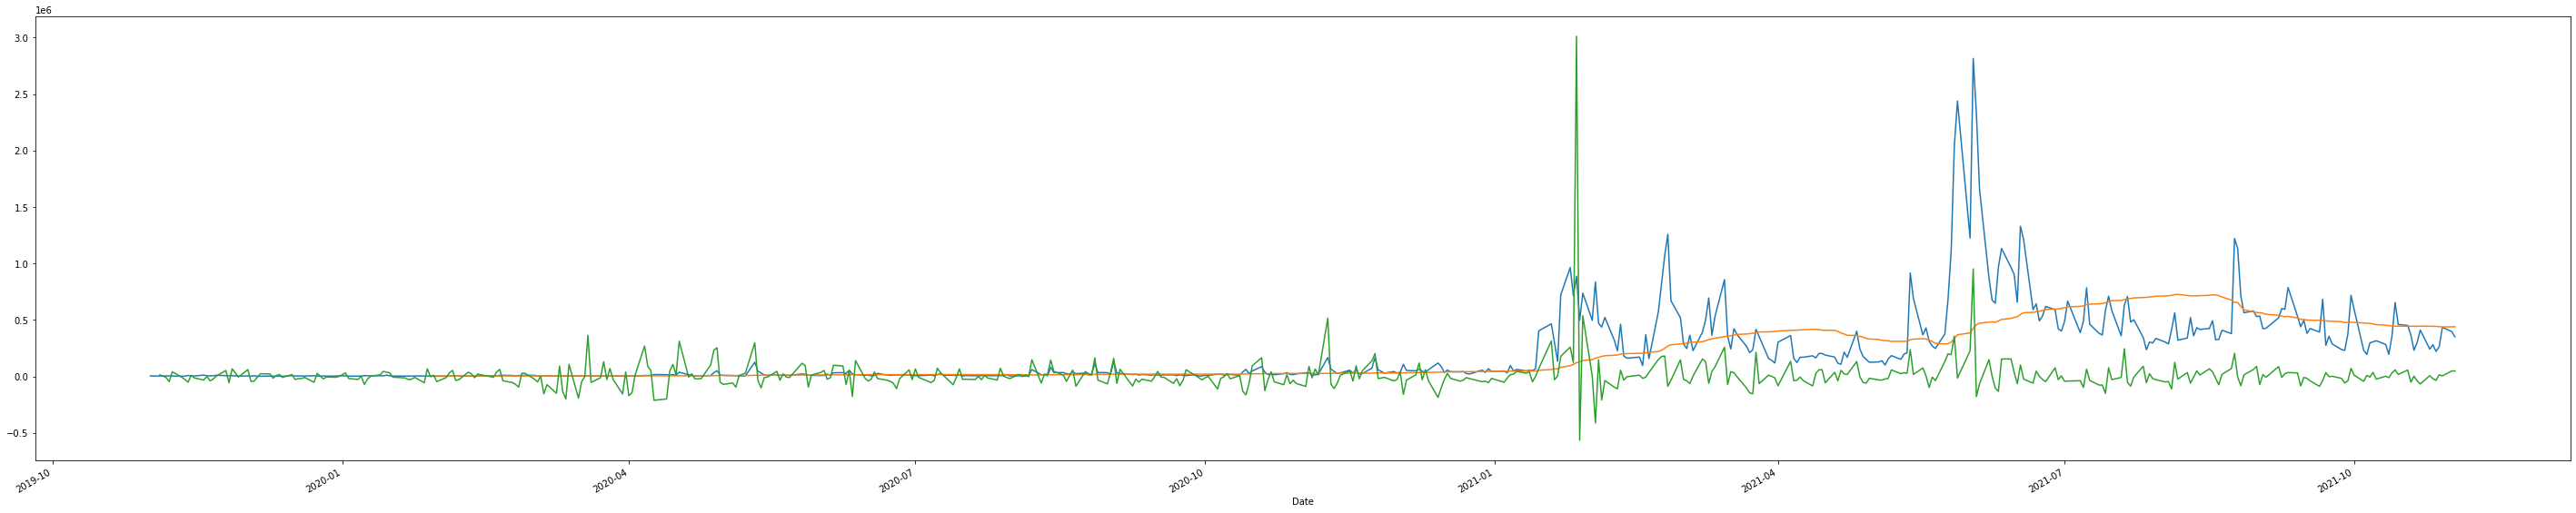

In [ ]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()
#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1

pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10))
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart)
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart)
#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



In [193]:
start_date = "2020-04-01"
end_date = "2021-11-09"

call_volume_df = call_volume_df.loc[start_date:end_date]
put_volume_df = put_volume_df.loc[start_date:end_date]
SPY_prices_df = SPY_prices_df.loc[start_date:end_date]
price_df = price_df.loc[start_date:end_date]

display(SPY_prices_df.head())
#display(put_volume_df.head())

,SPY
date,
2020-04-01,240.7032
2020-04-02,246.2575
2020-04-03,242.6981
2020-04-06,258.9992
2020-04-07,259.2632


In [455]:
#Inputs
#nDay Return
shift = 3
# Call/Put Ratio Threshold
call_put_ratio_threshold = 2
adv_multiple = 4 #avg daily vol

short_interest_threshold = 10
filter_input_sector = "Consumer Discretionary"


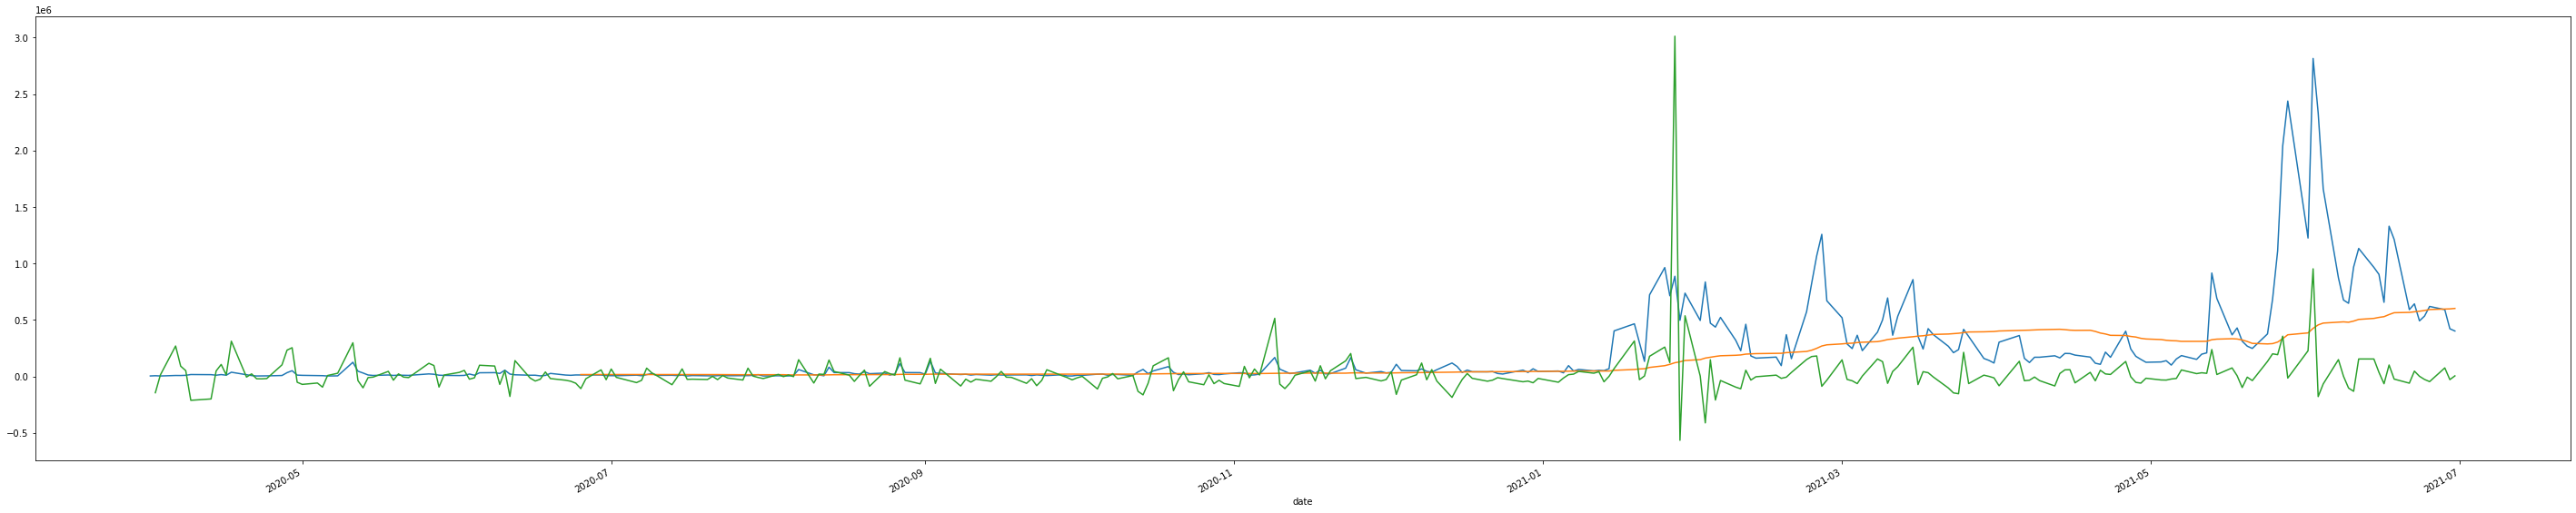

In [195]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()

#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1


pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10))
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart)
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart)
#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



In [196]:
spy_pct_change = SPY_prices_df.pct_change()
spy_roll_var = spy_pct_change.rolling(60).var()
rolling_cov = pct_change_one_day.rolling(60).cov(spy_pct_change['SPY'])
rolling_beta = rolling_cov.copy()

for ticker in rolling_cov:
    rolling_beta[ticker] = rolling_cov[ticker]/spy_roll_var['SPY']

rolling_beta

,AAPL,TSLA,F,BABA,BAC,T,AMD,PLTR,AAL,NIO,...,RADA,DBI,GDOT,RL,SUMO,CNDT,IO,LL,DOLE,SYK
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,1.418808,1.710129,0.592923,0.107048,0.818609,0.381530,1.354127,1.159309,1.276011,0.806717,...,1.568291,1.672310,1.341088,1.173590,0.547995,1.902462,0.413647,1.941608,NaN,1.020480
2021-06-25,1.401573,1.656931,0.605948,0.151436,0.840801,0.397906,1.321602,1.116344,1.280866,0.767044,...,1.524559,1.674006,1.332129,1.157428,0.509385,1.910779,0.360980,1.940501,NaN,1.024315
2021-06-28,1.430449,1.747594,0.653758,0.191572,0.802608,0.386182,1.264091,1.197164,1.312326,0.770592,...,1.428725,1.790867,1.282931,1.269863,0.463195,1.843294,0.126125,1.858090,NaN,1.065668


In [197]:

shift_amt = shift * -1
shifted = price_df.shift(periods=shift_amt, axis="rows")
period_day_return = shifted/price_df-1

ticker_names = list(period_day_return)

trailing_sixty_day = sixty_day_rolling_volume_df.shift(periods=-1, axis="rows")
volume_indicator = adv_multiple * trailing_sixty_day

good_vol_signal = {}
no_vol_signal = {}

for ticker in ticker_names:
    i = 0
    good_vol_signal[ticker] = []
    no_vol_signal[ticker] = []

    for value in call_volume_df[ticker]:
        date = call_volume_df.index[i]
        if(value > volume_indicator[ticker][i]):
            good_vol_signal[ticker].append(date)
        else:
            no_vol_signal[ticker].append(date)
        i+= 1



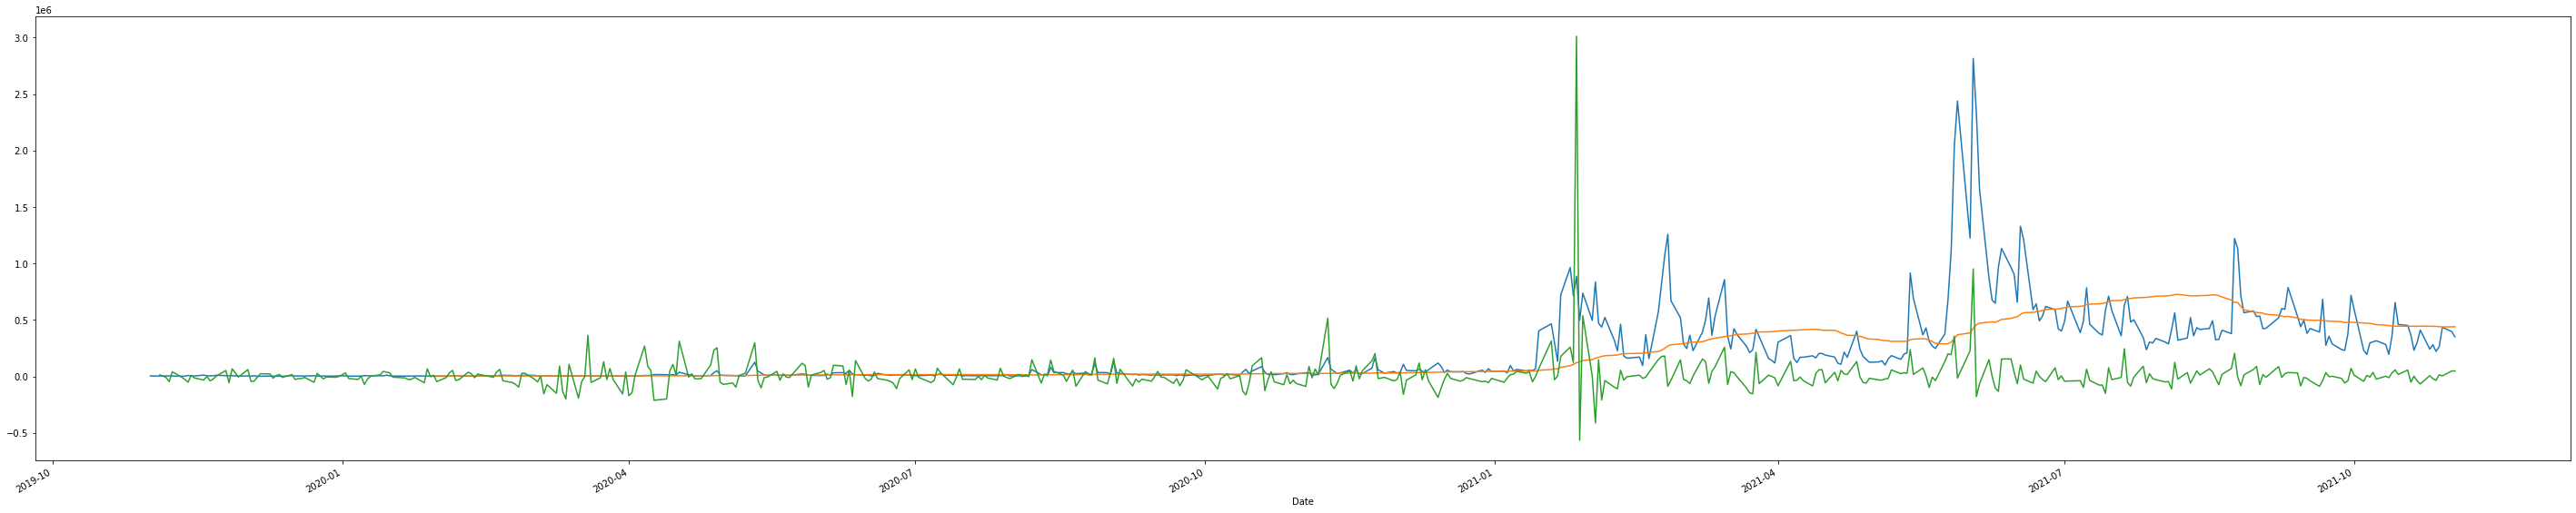

In [ ]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()
#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1

pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10))
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart)
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart)
#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



In [198]:
good_vol_signal["AMC"]

[Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-11-09 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-01-25 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-01-27 00:00:00'),
 Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-02-02 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2021-05-27 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-06-02 00:00:00'),
 Timestamp('2021-06-03 00:00:00')]

In [199]:
#call_volume_df.iloc[2]['AAPL']
#call_volume_df[call_volume_df[ticker]== call_volume_df.iloc[2]['AAPL']].index.values
# notes for pulling index value
# call_volume_df.index[0]



In [200]:
call_put_ratio = call_volume_df / put_volume_df


In [201]:

good_ratio_signal = {}
no_ratio_signal = {}

for ticker in ticker_names:
    i = 0
    good_ratio_signal[ticker] = []
    no_ratio_signal[ticker] = []

    for ratio in call_put_ratio[ticker]:
        date = call_put_ratio.index[i]
        if(ratio > call_put_ratio_threshold):
            good_ratio_signal[ticker].append(date)
        else:
            no_ratio_signal[ticker].append(date)
        i+= 1

In [202]:
good_ratio_signal["AMC"]

[Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-07-08 00:00:00'),
 Timestamp('2020-07-09 00:00:00'),
 Timestamp('2020-07-23 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-11 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-14 00:00:00'),
 Timestamp('2020-08-17 00:00:00'),
 Timestamp('2020-08-18 00:00:00'),
 Timestamp('2020-08-19 00:00:00'),
 Timestamp('2020-08-20 00:00:00'),
 Timestamp('2020-08-21 00:00:00'),
 Timestamp('2020-08-24 00:00:00'),
 Timestamp('2020-08-25 00:00:00'),
 Timestamp('2020-08-26 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2020-08-28 00:00:00'),
 Timestamp('2020-08-31 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-09-03 00:00:00'),
 Timestamp('2020-09-04 00:00:00'),
 Timestamp('2020-09-09 00:00:00'),
 Timestamp('2020-09-14 00:00:00'),
 Timestamp('2020-09-16 00:00:00'),
 Timestamp('2020-09-

In [203]:
#Create final signal date lists within dictionaries
good_final_signal = {}
no_final_signal = {}

def intersection (lst1, lst2):
    return list (set(lst1) & set(lst2))

print(intersection(good_vol_signal["AMC"], good_ratio_signal["AMC"]))

for ticker in ticker_names:
    good_final_signal[ticker] = intersection(good_vol_signal[ticker], good_ratio_signal[ticker])

[Timestamp('2020-11-24 00:00:00'), Timestamp('2021-01-26 00:00:00'), Timestamp('2021-02-25 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2021-01-25 00:00:00'), Timestamp('2020-09-02 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-19 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2020-08-13 00:00:00'), Timestamp('2021-01-15 00:00:00'), Timestamp('2020-08-27 00:00:00')]


In [204]:
good_final_signal["AMC"]

[Timestamp('2020-11-24 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2021-01-25 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2020-08-27 00:00:00')]

In [205]:
def union (lst1, lst2):
    return list (set(lst1) | set(lst2))

for ticker in ticker_names:
    no_final_signal[ticker] = union(no_vol_signal[ticker], no_ratio_signal[ticker])


In [305]:
market_cap = Path("./data/Market_Cap_20211102.csv")

market_cap_df = pd.read_csv(
    market_cap, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

spy_shifted = SPY_prices_df.shift(periods=shift_amt, axis="rows")
spy_period_day_return = spy_shifted/SPY_prices_df-1

#beta_adj_outperf = (period_day_return/rolling_beta)

beta_adj_outperf = period_day_return.copy()
for ticker in ticker_names:
    beta_adj_outperf[ticker] = period_day_return[ticker] - (spy_period_day_return['SPY'] * rolling_beta[ticker])

display(beta_adj_outperf)

,AAPL,TSLA,F,BABA,BAC,T,AMD,PLTR,AAL,NIO,...,RADA,DBI,GDOT,RL,SUMO,CNDT,IO,LL,DOLE,SYK
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,0.013214,-0.009077,-0.020009,0.049991,-0.003537,-0.006848,0.031439,-0.003321,-0.064628,0.102413,...,-0.027551,-0.075670,-0.051255,-0.036084,-0.035868,-0.032254,-0.057075,-0.022262,NaN,-0.007459
2021-06-25,0.024162,0.006022,-0.023784,-0.008042,-0.012228,-0.005158,0.092565,-0.019478,-0.049808,0.177779,...,0.004768,-0.065883,-0.033342,-0.031744,-0.040372,-0.018352,-0.033634,0.002974,NaN,-0.013520
2021-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
beta_adj_outperf.describe().transpose()['max'].dropna().sort_values()

COUR    -0.073231
COMP    -0.069237
KVSB     0.008499
ROVR     0.009720
MYPS     0.010593
          ...    
BNGO     4.413574
AMC      4.729029
WIMI     6.070101
OCGN     7.861733
KODK    14.788829
Name: max, Length: 1171, dtype: float64

In [307]:
good_signal_returns = {}
no_signal_returns = {}

for ticker in ticker_names:
    good_signal_returns[ticker] = []
    no_signal_returns[ticker] = []
    for date in good_final_signal[ticker]:
        change = beta_adj_outperf.loc[date][ticker]
        good_signal_returns[ticker].append(change)
    for date in no_final_signal[ticker]:
        change = beta_adj_outperf.loc[date][ticker]
        no_signal_returns[ticker].append(change)
      
    

In [310]:
total=0
for ticker in ticker_names:
    total = total + len(good_signal_returns[ticker])
print(total)

6537


In [311]:
totalno=0
for ticker in ticker_names:
    totalno = totalno + len(no_signal_returns[ticker])
print(totalno) 

369888


In [456]:


short_interest_max  = {}
for ticker in short_interest_df:
    short_interest_max[ticker] = short_interest_df[ticker].max()

filtered_short_interest = []
for ticker in short_interest_max:
    if(short_interest_max[ticker] > short_interest_threshold):
        filtered_short_interest.append(ticker)

len(filtered_short_interest)

611

In [449]:
all_sector_names = all_sectors_df['value']
all_sectors_unique = all_sector_names.unique()
all_sectors_unique

array(['Information Technology', 'Consumer Discretionary', 'Energy',
       'Consumer Staples', 'Financials', 'Real Estate', 'Industrials',
       'Materials', 'Health Care', 'Communication Services', nan,
       'Utilities'], dtype=object)

In [450]:

#all_sectors_unique

filtered_tickers_df = all_sectors_df[all_sectors_df.value == filter_input_sector]
sector_filtered_list = filtered_tickers_df['ticker'].tolist()



In [457]:
import math

good_signal_returns_list = []
#filtered_ticker_names = sector_filtered_list #filtered_short_interest #['BBBY']

filtered_ticker_names = intersection(sector_filtered_list, filtered_short_interest)

for ticker in filtered_ticker_names:
    good_signal_returns_list = good_signal_returns_list + good_signal_returns[ticker]

no_signal_returns_gross_list = []
for ticker in filtered_ticker_names:
    no_signal_returns_gross_list = no_signal_returns_gross_list  + no_signal_returns[ticker]
no_signal_returns_list = [x for x in no_signal_returns_gross_list if np.isnan(x) == False]
len(no_signal_returns_list)


good_signal_returns_list = [x for x in good_signal_returns_list if math.isnan(x) == False]

In [458]:
#import matplotlib.pyplot as plt

#plt.hist(good_signal_returns['AMC'], density=True, bins=300)  # density=False would make counts
#plt.axis([-.5, 5, 0, 10]) 
#good_signal_returns_list.plot.hist()

import hvplot.pandas

good_signal_returns_list_df = pd.DataFrame(good_signal_returns_list, columns=['returns'])



#good_signal_returns_list_df.groupby('returns').size()

good_signal_returns_list_df.hvplot.hist(bins=800, xlim=(-1,2))




:Histogram   [returns]   (returns_count)

In [459]:
good_signal_returns_list_df.describe()
#good_signal_returns_list_df.describe().transpose()['mean']

,returns
count,790.000000
mean,0.015712
std,0.208429
min,-0.375574
25%,-0.049621
50%,-0.003709
75%,0.048249
max,4.362971


In [454]:
no_signal_returns_list_df = pd.DataFrame(no_signal_returns_list)
no_signal_returns_list_df.hvplot.hist(bins=800, xlim=(-1,2))

:Histogram   [0]   (0_count)

In [463]:
no_signal_returns_list_df.describe()


,0
count,15486.000000
mean,0.009289
std,0.112524
min,-0.567349
25%,-0.040620
50%,0.000055
75%,0.046513
max,4.376746


In [377]:

print(np.var(good_signal_returns_list))

0.05305056290088913


In [378]:
print(np.var(no_signal_returns_list))

0.02121219154951264


In [462]:
tt, pvalue = ttest_ind(a=good_signal_returns_list, b=no_signal_returns_list, equal_var=True)
print(f"p value is {pvalue}")

p value is 0.02201801136459995


In [461]:
np.mean(good_signal_returns_list)

0.015711576330683544

In [460]:
np.mean(no_signal_returns_list)

0.007251307114133571